<a href="https://colab.research.google.com/github/lcbjrrr/ProgWdata/blob/main/CSC116_3_Prop_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proportions and Trends

## Proportions (Pie chart)

Pie charts are used to visually show how different parts contribute to a whole, making it easy to compare proportions of categories in a dataset. The code `student_per_course = grades.groupby('Course')['Student'].count()` groups the data by the 'Course' column and counts the number of students in each course. Then, `student_per_course.plot(kind='pie')` creates a pie chart to visually display the proportion of students enrolled in each course, making it easy to compare course popularity.

Course
ADM    5
ECO    2
LAW    5
Name: Student, dtype: int64


<Axes: ylabel='Student'>

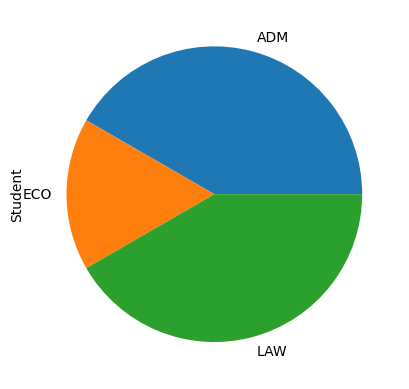

In [ ]:
import pandas as pd
grades = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ProgWdata/refs/heads/main/grades_final.csv')
student_per_course = grades.groupby('Course')['Student'].count()
print(student_per_course)
student_per_course.plot(kind='pie')

## Trend Analysis (Line chart)

Line charts are used to show trends and changes in data over time by connecting data points with lines, making it easy to track patterns, compare groups, and forecast future values. Setting the 'date' column as the index with datetime format allows easy time-based operations and plotting. Dropping the original 'date' column avoids duplication since the dates are now the DataFrame index. Finally, plotting the data helps visualize trends over time for the countries listed in the dataset. This process is common in data analysis to prepare and explore time series data efficiently

[]

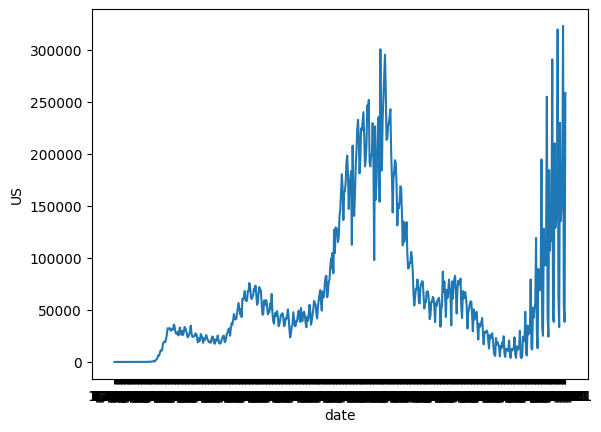

In [5]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/lcbjrrr/ProgWData/refs/heads/main/covid19.csv")
sns.lineplot(x = df["date"], y = df["US"]).set(**{})

/tmp/ipython-input-2201619002.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid.index = pd.to_datetime(covid['date'])


<Axes: xlabel='date'>

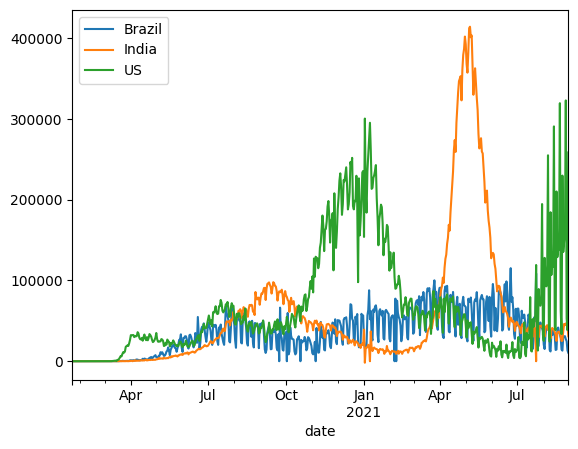

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ProgWData/refs/heads/main/covid19.csv')
covid.index = pd.to_datetime(covid['date'])
covid=covid.drop('date', axis=1)
covid.plot()

It is possible to filter the data to include only rows for the US. Then, it transposes the DataFrame and removes the first four rows (metadata). The .diff() function calculates daily differences in case counts, and .rolling(14).mean() smooths these daily differences by computing a 14-day moving average. Finally, the smoothed data is plotted to visualize trends in COVID-19 cases over time in the US.

[]

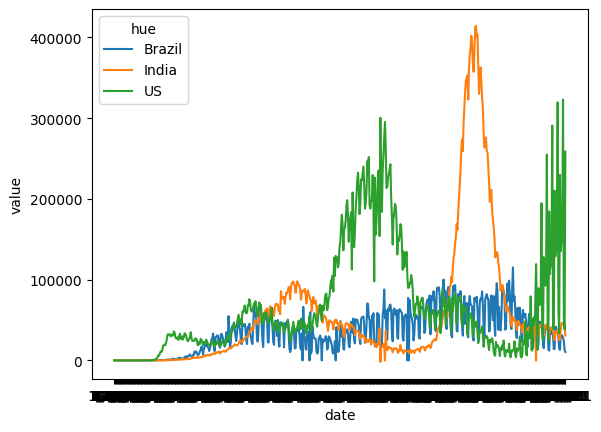

In [6]:
melted_df = pd.melt(df, id_vars=['date'], value_vars=['Brazil','India','US'], var_name="hue", value_name="value")
sns.lineplot(data=melted_df, x='date', y="value", hue="hue").set(**{})

<Axes: >

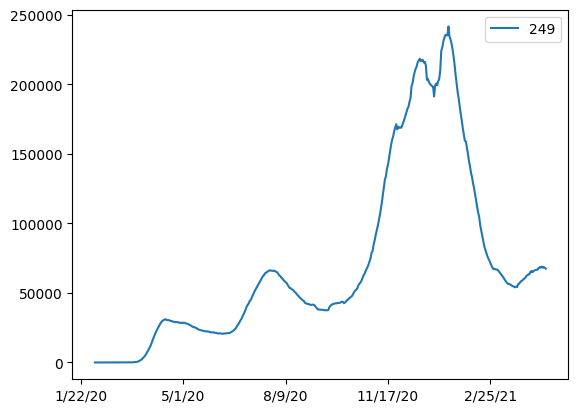

In [ ]:
import pandas as pd
cov = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ProgWData/master/covid_usa.csv')
us = cov[cov['Country/Region']=='US']
usa = us.T[4:]
usa.diff().rolling(14).mean().plot()